# Importing packages

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importing and cleaning the data

### Importing

In [62]:
total_df = pd.read_csv(r"C:\Users\titou\Desktop\python_test_files\ML_classic\hackathon\california_housing_hackathon\housing.csv")
total_df.sample(frac=1).reset_index(drop=True)
test_df = total_df.iloc[-2000:]
total_df = total_df.iloc[:-2000]

print(total_df.info(), "\n")
total_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18640 entries, 0 to 18639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18640 non-null  float64
 1   latitude            18640 non-null  float64
 2   housing_median_age  18640 non-null  float64
 3   total_rooms         18640 non-null  float64
 4   total_bedrooms      18462 non-null  float64
 5   population          18640 non-null  float64
 6   households          18640 non-null  float64
 7   median_income       18640 non-null  float64
 8   median_house_value  18640 non-null  float64
 9   ocean_proximity     18640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Plotting

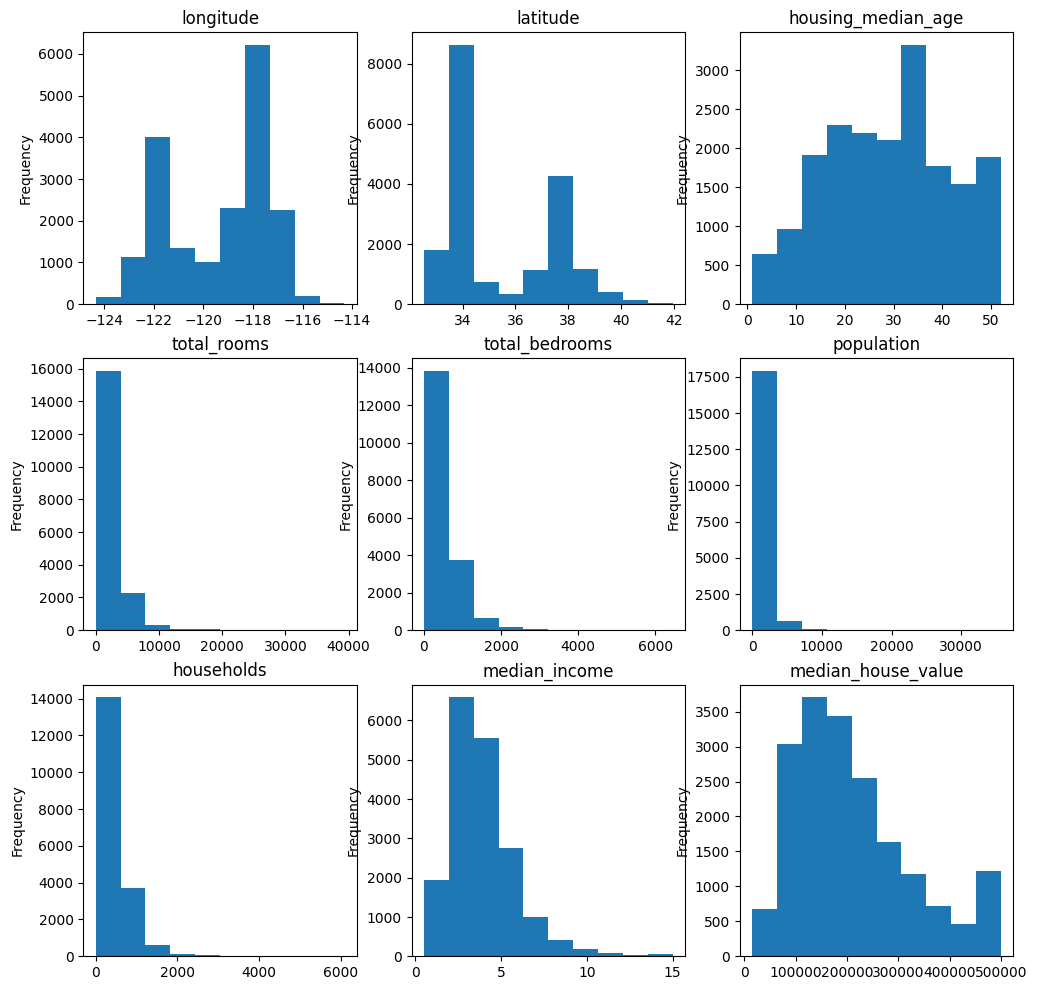

In [41]:
n = len(total_df.columns[:-1])
ncols = 3
nrows = (n + ncols - 1) // ncols  # auto number of rows

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(total_df.columns[:-1]):
    total_df[col].plot(kind="hist", ax=axes[i], title=col)

<Axes: xlabel='ocean_proximity'>

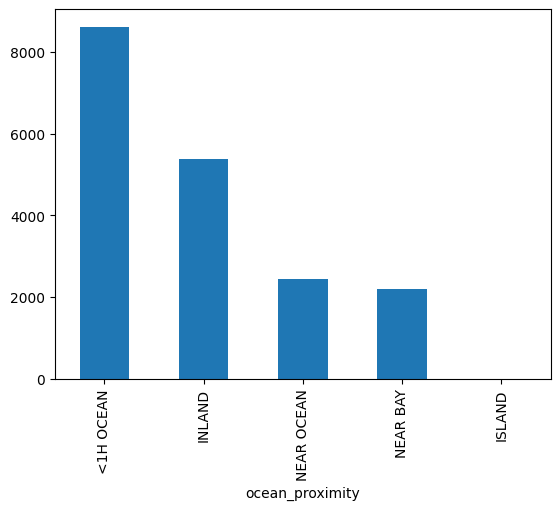

In [64]:
total_df["ocean_proximity"].value_counts().plot(kind="bar")

### Refomrating

In [92]:
one_hot_encoded = pd.get_dummies(total_df["ocean_proximity"],dtype="int") 


total_df_refromated= total_df.drop(columns=["ocean_proximity"])
total_df_refromated = pd.concat([total_df_refromated, one_hot_encoded], axis=1)
total_df_refromated.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
def get_mean_std(X_df,numeric_variables):
    mean_df = X_df.loc[:,numeric_variables].mean()
    std_df = X_df.loc[:,numeric_variables].std()
    return mean_df, std_df

def standardize(X_df, numeric_variables, mean_df, std_df):
    return (X_df.loc[:,numeric_variables] - mean_df) / std_df.std()

def fill_na(X_train_df, X_test_df):
    mean_value = X_train_df["total_bedrooms"].mean()
    X_train_df["total_bedrooms"] = X_train_df["total_bedrooms"].fillna(mean_value)
    X_test_df["total_bedrooms"] = X_test_df["total_bedrooms"].fillna(mean_value)
    return X_train_df, X_test_df


def X_y_split(total_df_refromated):
    X_df = total_df_refromated.loc[:,total_df_refromated.columns != "median_house_value"]
    y_df = total_df_refromated.loc[:,["median_house_value"]] / 2e4
    return X_df, y_df

In [136]:
numeric_variables = total_df_refromated.columns[:8]

X_df, y_df = X_y_split(total_df_refromated)
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
mean_df, std_df = get_mean_std(X_train_df,numeric_variables)
X_train_df = standardize(X_train_df, numeric_variables, mean_df, std_df)
X_test_df = standardize(X_test_df, numeric_variables, mean_df, std_df)

In [152]:
X_train_df["total_bedrooms"].mean()

np.float64(5.568366257814594e-17)

# Model Evaluation

### Linear regression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train_df, y_train_df)
model_lr.predict(X_test_df)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_predict_test_rf = model_lr.predict(X_test_df)
print(f"For Random Forest, the MSE on the test set is : {mean_squared_error(y_test_df.values, y_predict_test_rf):.2e}")

### Random Forest

In [138]:
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train_df, y_train_df)
rf.predict(X_test_df)

c:\Users\titou\Desktop\python_test_files\virtual_environments\ml_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ 9.92015  , 10.297201 ,  7.2105505, ...,  4.25905  ,  6.6945   ,
        7.80245  ], shape=(3728,))

In [139]:
y_predict_test_rf = rf.predict(X_test_df)
print(f"For Random Forest, the MSE on the test set is : {mean_squared_error(y_test_df.values, y_predict_test_rf):.2e}")

For Random Forest, the MSE on the test set is : 6.32e+00


### XGBoost

In [140]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_df, y_train_df)
xgb_model.predict(X_test_df)

array([10.875141 , 12.97862  ,  5.4462657, ...,  3.6159403,  7.3004723,
        8.029475 ], shape=(3728,), dtype=float32)

In [141]:
y_predict_test_xgb = xgb_model.predict(X_test_df)
print(f"For XGboost, the MSE on the test set is : {mean_squared_error(y_test_df.values, y_predict_test_xgb):.2e}")

For XGboost, the MSE on the test set is : 6.18e+00
